In [169]:
# import/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [170]:
import warnings
warnings.filterwarnings("ignore")

In [171]:
#loading initial data
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [172]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
522,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C


In [173]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
294,1186,3,"Wittevrongel, Mr. Camille",male,36.0,0,0,345771,9.5000,NaN,S
209,1101,3,"Delalic, Mr. Redjo",male,25.0,0,0,349250,7.8958,NaN,S
236,1128,1,"Warren, Mr. Frank Manley",male,64.0,1,0,110813,75.2500,D37,C
161,1053,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,C
399,1291,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,NaN,Q


In [174]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Age and cabin column has missing values
* total of 891 rows and 12 columns(including 'Survived' are there

In [175]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* Age and cabin column has missing values
* total of 418 rows and 11 columns are prest.

In [176]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [177]:
train_df.select_dtypes(exclude='object').head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [178]:
train_df.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [179]:
#number of null values in each column -train data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [180]:
#number of null values in each column -test data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Since 'cabin' has a very large number of missing values,dropping it

In [181]:
train_df.drop(columns='Cabin',inplace=True)
test_df.drop(columns='Cabin',inplace=True)

filling missing values in 'Age'

In [182]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [183]:
# use map function to apply the function on each Name value row i
train_df.Name.map(lambda x : GetTitle(x)).unique() # alternatively you can use : df.Name.map(GetTitle)

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer'], dtype=object)

In [184]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [185]:
# create Title feature
train_df['Title'] =  train_df.Name.map(lambda x : GetTitle(x))

In [186]:
 train_df.groupby('Title').median()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
Lady,658.5,1.0,1.0,40.5,0.5,0.0,63.05000
Master,345.0,1.0,3.0,3.5,1.0,1.0,29.06250
Miss,385.0,1.0,3.0,21.0,0.0,0.0,16.22085
Mr,466.0,0.0,3.0,30.0,0.0,0.0,9.35000
Mrs,438.0,1.0,2.0,35.0,1.0,0.0,26.00000
Officer,640.5,0.0,1.0,50.0,0.0,0.0,30.50000
Sir,600.0,0.0,2.0,42.0,0.0,0.0,13.00000


In [187]:
# replace missing values in train data
title_age_median = train_df.groupby('Title').Age.transform('median')
train_df.Age.fillna(title_age_median , inplace=True)

In [188]:
# create Title feature
test_df['Title'] =  test_df.Name.map(lambda x : GetTitle(x))

In [189]:
# replace missing values in test data
title_age_median = test_df.groupby('Title').Age.transform('median')
test_df.Age.fillna(title_age_median , inplace=True)

In [190]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
dtype: int64

In [191]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64

In [192]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [193]:
#imputing Farewith median and embarked with the mode value
train_df['Embarked'].fillna('S',inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace=True)

In [194]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [195]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [196]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [197]:
#droping 'Name',Ticket nd Title
train_df.drop(columns=['Name','Ticket','Title'],inplace=True)
test_df.drop(columns=['Name','Ticket','Title'],inplace=True)

In [198]:
train_df['Sex'].replace({'male' : 0,'female' : 1},inplace=True)
test_df['Sex'].replace({'male' : 0,'female' : 1},inplace=True)

In [199]:
#Label encoding 'Embarked'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df['Embarked']=le.fit_transform(train_df['Embarked'])
test_df['Embarked']=le.fit_transform(test_df['Embarked'])

In [200]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [201]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int32
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.2 KB


In [202]:
tr_pid=pd.DataFrame()
ts_pid=pd.DataFrame()
tr_pid['PassengerId']=train_df['PassengerId']
ts_pid['PassengerId']=test_df['PassengerId']

In [203]:
#droping 'PassengerId'
train_df.drop(columns=['PassengerId'],inplace=True)
test_df.drop(columns=['PassengerId'],inplace=True)

In [204]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


Survived       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pclass      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Sex         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age            AxesSubplot(0.125,0.391471;0.227941x0.222059)
SibSp       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Parch       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Fare              AxesSubplot(0.125,0.125;0.227941x0.222059)
Embarked       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

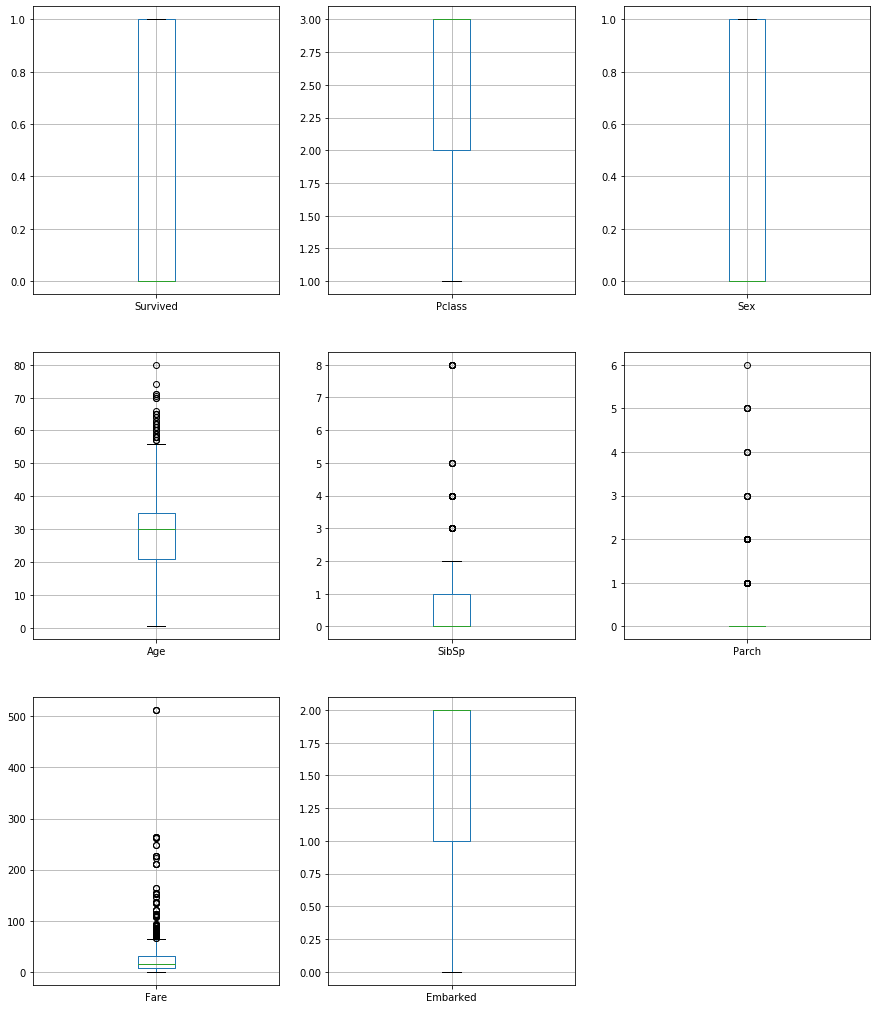

In [205]:
train_df.plot(kind='box',subplots=True,layout=(round(train_df.shape[1]/3),3),sharex=False,sharey=False,grid=True,figsize=(15,18))

In [206]:
train_df[train_df['Fare']>500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,1,35.0,0,0,512.3292,0
679,1,1,0,36.0,0,1,512.3292,0
737,1,1,0,35.0,0,0,512.3292,0


In [207]:
train_df.iloc[[258,679,737],6]=280

Pclass         AxesSubplot(0.125,0.657941;0.227941x0.222059)
Sex         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Age         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SibSp          AxesSubplot(0.125,0.391471;0.227941x0.222059)
Parch       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Fare        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Embarked          AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

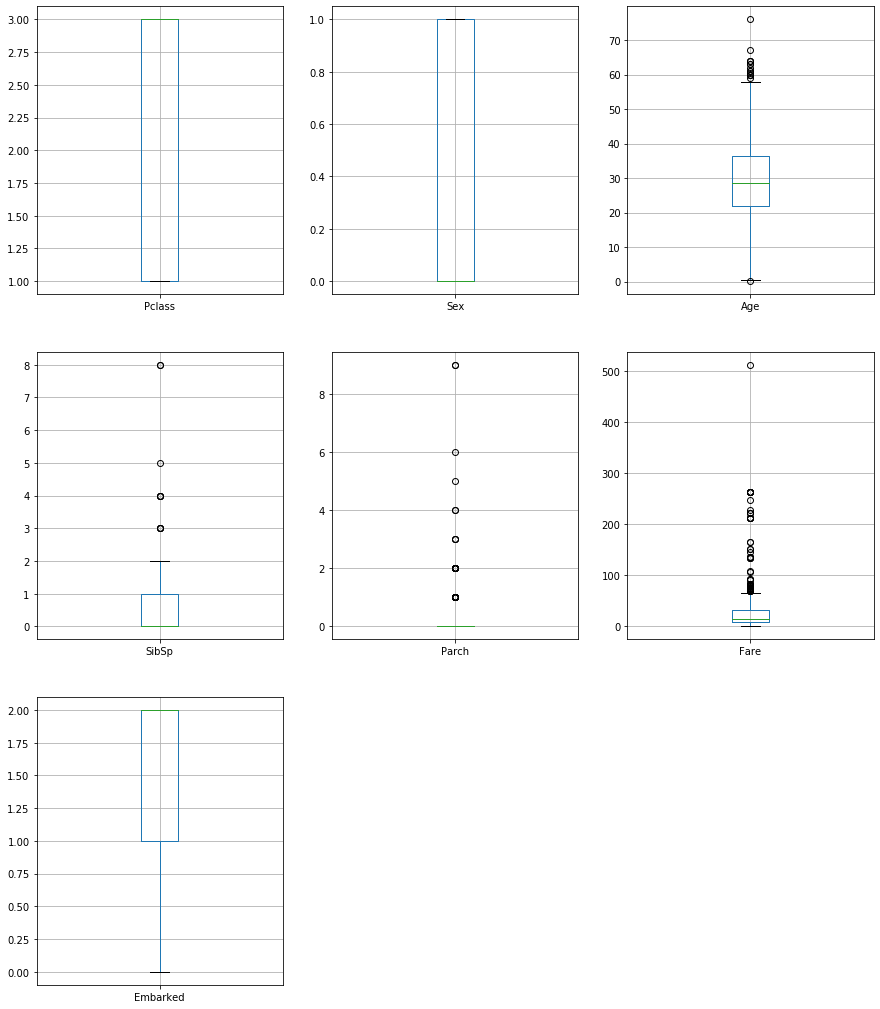

In [208]:
test_df.plot(kind='box',subplots=True,layout=(round(train_df.shape[1]/3),3),sharex=False,sharey=False,grid=True,figsize=(15,18))

In [209]:
test_df[test_df['Fare']>500]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
343,1,1,58.0,0,1,512.3292,0


In [210]:
test_df.iloc[343,6]=280

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022786BCE320>,
      dtype=object)

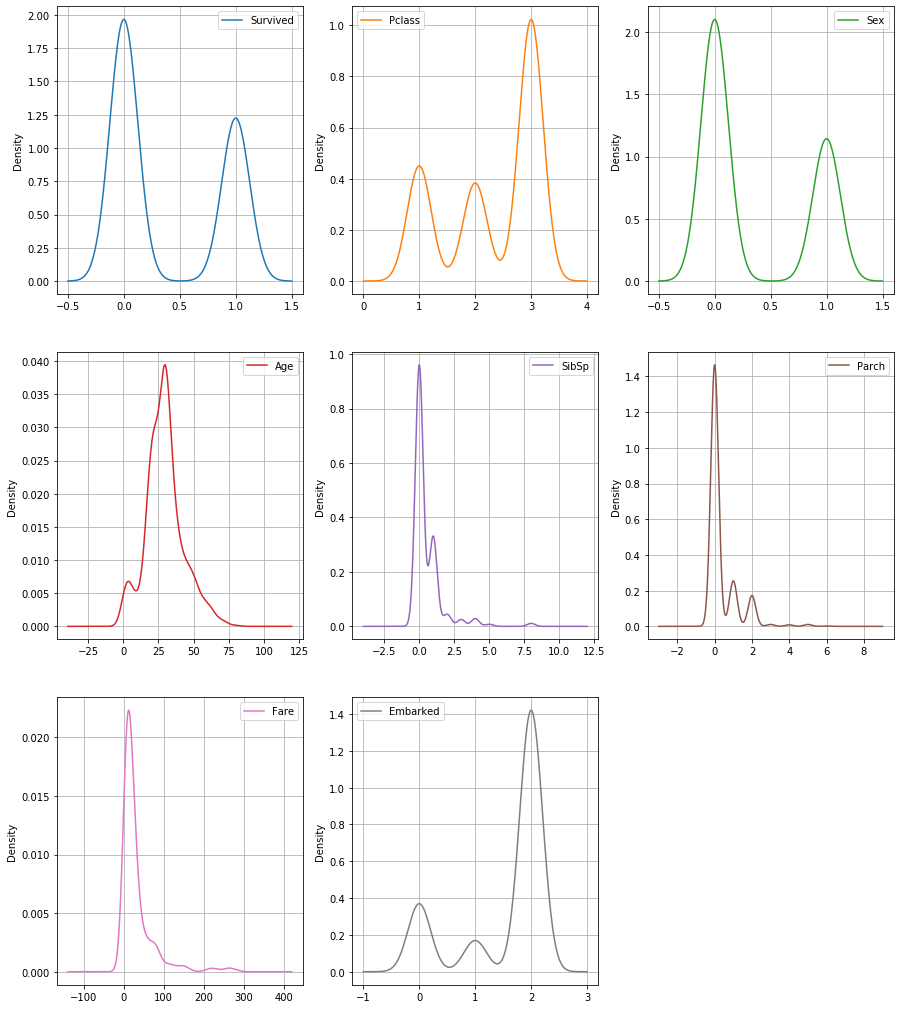

In [211]:
train_df.plot(kind='kde',subplots=True,layout=(round(train_df.shape[1]/3),3),sharex=False,sharey=False,grid=True,figsize=(15,18))

In [212]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.079016,-0.035322,0.081629,0.270679,-0.167675
Pclass,-0.338481,1.000000,-0.131900,-0.354320,0.083081,0.018443,-0.598528,0.162098
Sex,0.543351,-0.131900,1.000000,-0.104995,0.114631,0.245489,0.208653,-0.108262
Age,-0.079016,-0.354320,-0.104995,1.000000,-0.265631,-0.188183,0.103657,-0.018887
SibSp,-0.035322,0.083081,0.114631,-0.265631,1.000000,0.414838,0.190592,0.068230
Parch,0.081629,0.018443,0.245489,-0.188183,0.414838,1.000000,0.247662,0.039798
Fare,0.270679,-0.598528,0.208653,0.103657,0.190592,0.247662,1.000000,-0.221386
Embarked,-0.167675,0.162098,-0.108262,-0.018887,0.068230,0.039798,-0.221386,1.000000


In [213]:
# sns.pairplot(train_df,hue='Survived')

In [167]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# for i in train_df.drop(columns='Survived').columns:
#     train_df[i]=sc.fit_transform([train_df[i]])
from scipy.stats import zscore
train_df=zscore(train_df)


In [214]:
x=train_df.drop(columns='Survived')
y=train_df.Survived

In [215]:
from scipy.stats import zscore
x=zscore(x)

# Modeling

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,auc,roc_auc_score
from sklearn.model_selection import cross_val_score

In [221]:
#base models
lr=LogisticRegression(C=1.599858719606058, l1_ratio= 0.5187482220521373)
knn=KNeighborsClassifier()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [222]:
from sklearn.model_selection import cross_val_score

In [231]:
#cross val score
for model,name in zip([lr,knn,nb,dt,rf],['LogisticRegression','KNeighborsClassifier','GaussianNB','Decision_tree','Random_Forrest']):
    auc = cross_val_score(model,x,y,cv=5,scoring='roc_auc')
    BE =1-np.mean(auc)#Bias error
    VE =np.var(1-auc,ddof=1)#variance error
    print(name)
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)
    print("\tF1 score:",np.mean(auc))

LogisticRegression
		Bais error :  0.14907174883587992
		Variance error:  0.0003069136625166305
	F1 score: 0.8509282511641201
KNeighborsClassifier
		Bais error :  0.14352910958051857
		Variance error:  0.0008301413836146583
	F1 score: 0.8564708904194814
GaussianNB
		Bais error :  0.16831884093522098
		Variance error:  0.0013070802437697912
	F1 score: 0.831681159064779
Decision_tree
		Bais error :  0.2566332682037533
		Variance error:  0.0012071178860186861
	F1 score: 0.7433667317962467
Random_Forrest
		Bais error :  0.15203775951400245
		Variance error:  0.0014435106269310707
	F1 score: 0.8479622404859976


In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
#grid search on LogisticRegressor
# define the parameter values that should be searched
l1_ratio=[np.random.uniform() for i in range(10) ]
C = np.logspace(0, 10, 50)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C,l1_ratio=l1_ratio)
# instantiate and fit the grid
grid = GridSearchCV(lr, param_grid, cv=10, scoring='roc_auc', return_train_score=False,n_jobs=-1)
grid.fit(x, y)
grid.best_params_

{'C': 1.599858719606058, 'l1_ratio': 0.5187482220521373}

In [232]:
# [np.random.uniform() for i in range(10) ]

# Ensemble 

In [111]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [89]:
lr=LogisticRegression(C=1.599858719606058, l1_ratio= 0.5187482220521373)

In [230]:
#ada boost

ab = AdaBoostClassifier(base_estimator=lr, n_estimators=20)
auc = cross_val_score(ab,x,y,cv=5,scoring='roc_auc')
BE =1-np.mean(auc)#Bias error
VE =np.var(1-auc,ddof=1)#variance error
print('AdaBoostClassifier')
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)
print("\tF1 score:",np.mean(auc))

AdaBoostClassifier
		Bais error :  0.14830608520740862
		Variance error:  0.0002446027894715517
	F1 score: 0.8516939147925914


In [227]:
#g boost

gb = GradientBoostingClassifier( n_estimators=9)
b = cross_val_score(gb,x,y,cv=5,scoring='roc_auc')
BE =1-np.mean(auc)#Bias error
VE =np.var(1-auc)#variance error
print('GradientBoostingClassifier')
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)
print("\troc_auc score:",np.mean(auc))

GradientBoostingClassifier
		Bais error :  0.16004383270514566
		Variance error:  0.0010187820791691129
	roc_auc score: 0.8399561672948543


In [138]:
import xgboost as xgb

In [235]:
xgb = xgb.XGBClassifier(n_estimators=50)
auc = cross_val_score(ab,x,y,cv=5,scoring='roc_auc')
BE =1-np.mean(auc)#Bias error
VE =np.var(1-auc,ddof=1)#variance error
print('XGBClassifier')
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)
print("\tF1 score:",np.mean(auc))

XGBClassifier
		Bais error :  0.1353183777046374
		Variance error:  0.0016396311754090479
	F1 score: 0.8646816222953626


In [299]:
# XGBoost,Tune n_estimators
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
# grid search
model = XGBClassifier()
n_estimators = range(1, 100)
param_grid = dict(n_estimators=n_estimators)
r_search = RandomizedSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=5)
r_search.fit(x,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [300]:
grid_search.best_params_

{'n_estimators': 50}

In [ ]:
for in range()

In [240]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=8)

In [241]:
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print("  -roc_auc_score:",roc_auc_score(ytest,ypred))

  -roc_auc_score: 0.7709963484611372


### random forest

In [293]:

rf = RandomForestClassifier(n_estimators=50,max_depth=7,max_features='log2')
auc = cross_val_score(rf,x,y,cv=5,scoring='roc_auc')
BE =1-np.mean(auc)#Bias error
VE =np.var(1-auc,ddof=1)#variance error
print('AdaBoostClassifier')
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)
print("\tF1 score:",np.mean(auc))

AdaBoostClassifier
		Bais error :  0.13320753583371214
		Variance error:  0.0013453444103947803
	F1 score: 0.8667924641662879


In [296]:
#ada boost

ab = AdaBoostClassifier(base_estimator=rf, n_estimators=10)
auc = cross_val_score(ab,x,y,cv=5,scoring='roc_auc')
BE =1-np.mean(auc)#Bias error
VE =np.var(1-auc,ddof=1)#variance error
print('AdaBoostClassifier')
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)
print("\tF1 score:",np.mean(auc))

AdaBoostClassifier
		Bais error :  0.13945481528724923
		Variance error:  0.0015296805614123945
	F1 score: 0.8605451847127508


In [ ]:
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print("  -roc_auc_score:",roc_auc_score(ytest,ypred))

# final fitting

In [237]:
xtest_std

In [264]:
xgb.fit(x,y)
y_predict=xgb.predict(xtest_std)

In [265]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [266]:
ts_pid['Survived']=y_predict

In [192]:
ts_pid.drop(columns='y_predicted',inplace=True)

In [267]:
ts_pid.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [268]:
ts_pid.to_csv("submission5.csv")

In [189]:
ts_pid.shape

(418, 2)

# PCA 

-showing low scores

In [195]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [196]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,2
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,2
4,3,1,22.0,1,1,12.2875,2


In [197]:
x=train_df.drop(columns='Survived')
y=train_df.Survived

In [198]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_std=sc.fit_transform(x)
xtest_std=sc.fit_transform(xtest)

In [199]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95,svd_solver = 'full')
principalComponents = pca.fit_transform(x_std)
xpca = pd.DataFrame(data = principalComponents)

In [210]:
principalComponents = pca.fit_transform(xtest_std)
tpca = pd.DataFrame(data = principalComponents)

In [200]:
#cross val score
for model,name in zip([lr,knn,nb,dt,rf],['LogisticRegression','KNeighborsClassifier','GaussianNB','Decision_tree','Random_Forrest']):
    auc = cross_val_score(model,xpca,y,cv=5,scoring='roc_auc')
    BE =1-np.mean(auc)#Bias error
    VE =np.var(auc,ddof=1)#variance error
    print(name)
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)
    print("\tF1 score:",np.mean(auc))

LogisticRegression
		Bais error :  0.14795303097850088
		Variance error:  0.00029502410633578074
	F1 score: 0.8520469690214991
KNeighborsClassifier
		Bais error :  0.14475946671956685
		Variance error:  0.00084090470290083
	F1 score: 0.8552405332804331
GaussianNB
		Bais error :  0.1576300103027034
		Variance error:  0.0007856645874008967
	F1 score: 0.8423699896972966
Decision_tree
		Bais error :  0.27323385785398036
		Variance error:  0.0017910447269627984
	F1 score: 0.7267661421460196
Random_Forrest
		Bais error :  0.1674092611987682
		Variance error:  0.001715443629759388
	F1 score: 0.8325907388012318


In [282]:
bgcl = BaggingClassifier(base_estimator=lr, n_estimators=50,n_jobs=-1)
auc = cross_val_score(bgcl,xpca,y,cv=5,scoring='roc_auc')
BE =1-np.mean(auc)#Bias error
VE =np.var(auc,ddof=1)#variance error
print('BaggingClassifier')
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)
print("\tF1 score:",np.mean(auc))

BaggingClassifier
		Bais error :  0.14853292243394078
		Variance error:  0.00030598486684125023
	F1 score: 0.8514670775660592


In [283]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xpca,y,test_size=0.2,random_state=5)

In [284]:
bgcl.fit(xtrain,ytrain)
ypred=bgcl.predict(xtest)
print("  -roc_auc_score:",roc_auc_score(ytest,ypred))

  -roc_auc_score: 0.7988871224165343


In [222]:
bgcl.fit(x,y)
y_predict=bgcl.predict(xtest_std)

In [223]:
len(y_predict)

179

In [266]:
# ts_pid['Survived']=y_predict
# ts_pid.drop(columns='y_predicted',inplace=True)
# ts_pid.to_csv("submission2.csv")

# RFE

-NOT MUCH CHANGE IN RESULTS

In [227]:
from sklearn.feature_selection import RFE

In [230]:
#optimum no of features to select for RFE
nof_list=np.arange(1,15)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
#     model =LogisticRegression()
    rfe = RFE(rf,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    rf.fit(X_train_rfe,y_train)
    ypred=rf.predict(X_test_rfe)
    score = roc_auc_score(y_test,ypred)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.810476


In [232]:
cols = list(x.columns)
# model = LinearRegression()
#Initializing RFE model
rfe = RFE(rf, 5)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')


In [234]:
xuptrain=train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare']]

In [235]:
#cross val score
for model,name in zip([lr,knn,nb,dt,rf],['LogisticRegression','KNeighborsClassifier','GaussianNB','Decision_tree','Random_Forrest']):
    auc = cross_val_score(model,xuptrain,y,cv=5,scoring='roc_auc')
    BE =1-np.mean(auc)#Bias error
    VE =np.var(auc,ddof=1)#variance error
    print(name)
    print("\t\tBais error : ", BE)
    print("\t\tVariance error: ",VE)
    print("\tF1 score:",np.mean(auc))

LogisticRegression
		Bais error :  0.14682989589932505
		Variance error:  0.0003411548629642982
	F1 score: 0.853170104100675
KNeighborsClassifier
		Bais error :  0.27099801482764485
		Variance error:  0.0033821048458828286
	F1 score: 0.7290019851723551
GaussianNB
		Bais error :  0.1599558206718159
		Variance error:  0.0007774903411930836
	F1 score: 0.8400441793281841
Decision_tree
		Bais error :  0.2518624784649328
		Variance error:  0.0016225933359273375
	F1 score: 0.7481375215350672
Random_Forrest
		Bais error :  0.137654405454389
		Variance error:  0.0021778953377067506
	F1 score: 0.862345594545611


In [236]:
bgcl = BaggingClassifier(base_estimator=rf, n_estimators=50,n_jobs=-1)
auc = cross_val_score(bgcl,xuptrain,y,cv=5,scoring='roc_auc')
BE =1-np.mean(auc)#Bias error
VE =np.var(auc,ddof=1)#variance error
print('BaggingClassifier')
print("\t\tBais error : ", BE)
print("\t\tVariance error: ",VE)
print("\tF1 score:",np.mean(auc))

BaggingClassifier
		Bais error :  0.1282882918914383
		Variance error:  0.0012163320038841676
	F1 score: 0.8717117081085617


In [237]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xuptrain,y,test_size=0.2,random_state=5)

In [241]:
bgcl.fit(xtrain,ytrain)
ypred=bgcl.predict(xtest)
print("  -roc_auc_score:",roc_auc_score(ytest,ypred))

  -roc_auc_score: 0.8185612082670907


In [242]:
bgcl.fit(x,y)
y_predict=bgcl.predict(test_df)

In [243]:
ts_pid['Survived']=y_predict

In [244]:
ts_pid.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [245]:
ts_pid.to_csv("submission2.csv")